# Доля механики

In [2]:
import pandas as pd

data = pd.read_csv("extended_data.csv", index_col=0, sep=';')

data.dropna(subset=['transmission'])

,manufacturer,model,year,price,URL,vehicle_passport,owners,wanted,limitations,city,...,power_in_hp,no_milage_in_russia,mileage,docs_ok,need_fix,is_sport_line,is_crossover,age,law,mileage_per_year
0,BMW,5-Series,1977,1100000,https://auto.drom.ru/moscow/bmw/5-series/52480...,NaN,NaN,NaN,NaN,Москва,...,94.0,False,200000.0,True,False,NaN,False,oldest,False,4246.284501
1,BMW,5-Series,1978,130000,https://auto.drom.ru/nizhniy-novgorod/bmw/5-se...,NaN,NaN,NaN,NaN,Нижний Новгород,...,90.0,False,216000.0,True,False,False,False,oldest,False,4685.466377
2,BMW,5-Series,1979,150000,https://auto.drom.ru/ivanovo/bmw/5-series/5320...,NaN,NaN,NaN,NaN,Иваново,...,90.0,False,185210.0,True,True,NaN,False,oldest,False,4106.651885
3,BMW,5-Series,1982,75000,https://auto.drom.ru/moscow/bmw/5-series/71841...,Характеристики совпадают с ПТС,4 записи о регистрации,Не числится в розыске,Ограничений не обнаружено,Москва,...,90.0,False,190000.0,True,True,False,False,oldest,False,4513.064133
4,BMW,5-Series,1982,340000,https://auto.drom.ru/moscow/bmw/5-series/51523...,Характеристики совпадают с ПТС,3 записи о регистрации,Не числится в розыске,Ограничений не обнаружено,Москва,...,90.0,False,318000.0,True,False,False,False,oldest,True,7553.444181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15024,Mercedes-Benz,B-Class,2014,1650000,https://auto.drom.ru/mytishchi/mercedes-benz/b...,Характеристики совпадают с ПТС,2 записи о регистрации,Не числится в розыске,Ограничений не обнаружено,Мытищах,...,156.0,False,143250.0,True,False,False,False,medium,True,14183.168317
15025,Mercedes-Benz,C-Class,2018,3199700,https://auto.drom.ru/moscow/mercedes-benz/c-cl...,Характеристики совпадают с ПТС,3 записи о регистрации,Не числится в розыске,Ограничений не обнаружено,Москва,...,150.0,False,80569.0,True,False,NaN,False,medium,True,13208.032787
15026,Mercedes-Benz,E-Class,2018,3000000,https://auto.drom.ru/moscow/mercedes-benz/e-cl...,Характеристики совпадают с ПТС,1 запись о регистрации,Не числится в розыске,Ограничений не обнаружено,Москва,...,184.0,False,238246.0,True,False,NaN,False,medium,True,39056.721311
15027,Mercedes-Benz,GLE,2021,8199000,https://auto.drom.ru/moscow/mercedes-benz/gle-...,NaN,NaN,NaN,NaN,Москва,...,330.0,True,63000.0,True,False,False,True,young,False,20322.580645


In [3]:
manual_cars = data[data['transmission'] == 'manual']
manual_count = manual_cars.groupby('year').size().reset_index(name='manual_count')
total_count = data.groupby('year').size().reset_index(name='all_count')
result = pd.merge(total_count, manual_count, on='year')
result

,year,all_count,manual_count
0,1975,1,1
1,1977,1,1
2,1978,1,1
3,1979,2,2
4,1980,3,2
5,1981,1,1
6,1982,6,6
7,1983,15,14
8,1984,18,17
9,1985,15,14


In [7]:
result['percentage_manual'] = (result['manual_count'] / result['all_count']) * 100

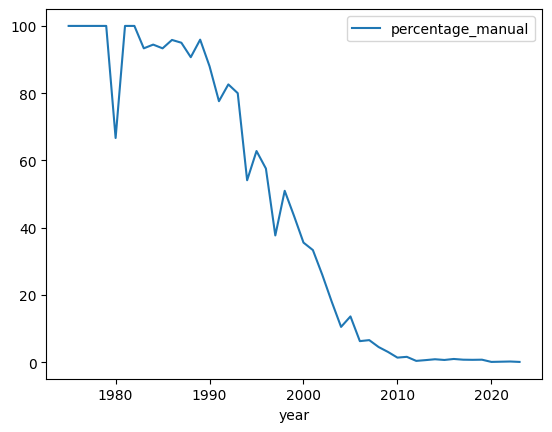

In [6]:
result.plot(x="year", y="percentage_manual");